<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_299_~_345.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 9. 비지도 학습**
* 오늘날 대부분의 머신러닝 애플리케이션이 지도 학습 기반이지만, 사용할 수 있는 데이터는 대부분 레이블이 없음. (즉 X는 있지만 y는 없음.) → 비지도 학습이 필요

 * 군집(clustering): 비슷한 샘플을 클러스터로 모음.
 * 이상치 탐지(outlier detection): "정상" 데이터가 어떻게 보이는지 학습. 그다음 비정상 샘플을 감지하는 데 사용.
 * 밀도 추정(density estimation): 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정함.

## 9.1 군집
* 군집: 유사한 특성을 가진 데이터 포인트들을 같은 그룹으로 묶는 것
* 분류와 달리 군집은 비지도 학습임.

* 분류(왼쪽) 대 군집(오른쪽)
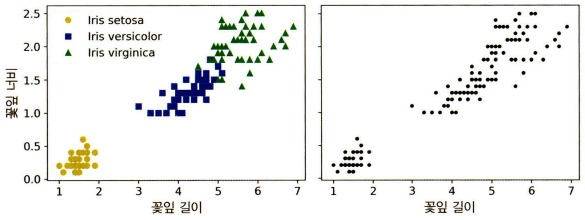

* 애플리케이션
 * 고객 분류
 * 데이터 분석
 * 차원 축소 기법
 * 이상치 탐지
 * 준지도 학습
 * 검색 엔진
 * 이미지 분할

 * 어떤 알고리즘은 센트로이드라 부르는 특정 포인트를 중심으로 모인 샘플을 찾음.

### 9.1.1 k-평균
* k-평균: 반복 몇 번으로 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘

* 샘플 덩어리 다섯 개로 이루어진 레이블 없는 데이터셋
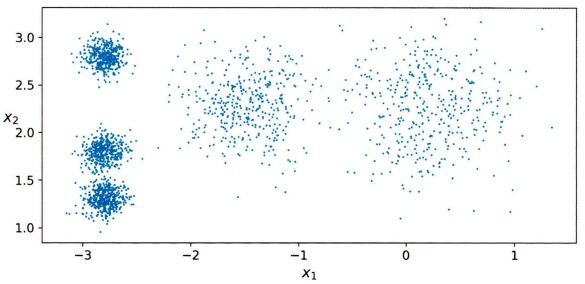

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import warnings
warnings.filterwarnings("ignore")

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [2]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

* 군집에서 각 샘플의 레이블은 알고리즘이 샘플에 할당한 클래스의 인덱스.


In [3]:
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [4]:
y_pred is kmeans.labels_

True

In [5]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [6]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

* k-평균의 결졍 경계 (브로노이 다이어그램)
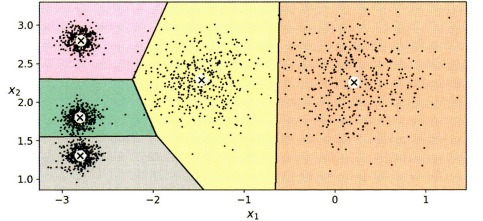

* 샘플은 대부분 적절한 클러스터에 잘 할당되었지만, 샘플 몇 개는 레이블이 잘못 부여됨.
* 실제 k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않음. 샘플은 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문.
* 소프트 군집: 하드 군집이라는 샘플을 하나의 클러스터에 할당하는 것보다 클러스터마다 샘플에 점수를 부여하는 것
* KMeans 클래스의 transform() 메서드는 각 센트로이드 사이의 거리를 반환함

In [7]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

* 고차원 데이터셋을 이런 방식으로 변환하면 k-차원 데이터셋이 만들어짐

**k-평균 알고리즘**
* 처음에 센트로이드를 랜덤하게 선정한 후, 그 다음 샘플에 레이블을 할당하고 센트로이드를 업데이트하고, 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 식으로 센트로이드가 변화가 없을 때까지 계속 함.
* 이 알고리즘은 제한된 횟수 안에 수렴하는 것을 보장하며, 무한하게 반복되지 않음.

* k-평균 알고리즘
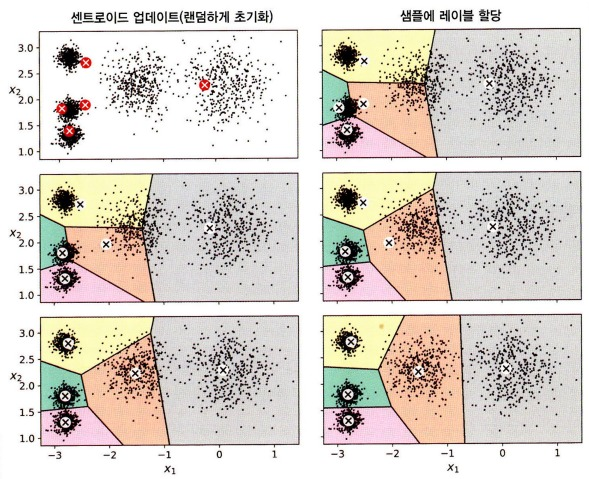

* 이 알고리즘이 수렴하는 것이 보장되지만 적절한 솔루션으로 수렴하지 못할 수 있음.
* 이 여부는 센트로이드 초기화에 달려있음.

**센트로이드 초기화 방법**
* init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init를 1로 설정할 수 있음.

In [8]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1)

* 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택하는 방법.
* 랜덤 초기화 횟수는 n_init 매개변수로 조절. (기본값은 10)
* 이는 fit() 메서드를 호출할 때 앞서 설명한 전체 알고리즘이 10번 실행된다는 뜻.
* 사이킷런은 이 중에 최선의 솔루션을 반환함.
* 이너셔: 각 샘플과 가장 가까운 센트로이드 사이의 펴균 제곱 거리
* KMeans 클래스는 알고리즘을 n_init번 시행하여 이너셔가 가장 낮은 모델을 반환함.
* inertia_ 인스턴스 변수로 모델의 이너셔를 확인할 수 있음.

In [9]:
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [10]:
kmeans.inertia_

211.5985372581684

* score() 메서드는 이너셔의 음숫값을 반환.
* 한 예측기가 다른 것보다 좋다면 score() 메서드가 더 높은 값을 반환해야 함.

In [11]:
kmeans.score(X)

-211.59853725816836

* k-평균++ 알고리즘: 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계. k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤.
* KMeans 클래스는 기본적으로 이 초기화 방법을 사용함. 원래 방식을 사용하고 싶다면 init 매개변수를 "random"으로 지정.

**k-평균 속도 개선과 미니배치 k-평균**
* 2013년 찰스 엘칸의 논문
 * 불필요한 거리 계산을 많이 피함으로서 알고리즘의 속도를 상당히 높을 수 있음.
 * 이를 위해 삼각 부등식을 사용하고, 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지함.
 * KMeans 클래스에서 기본으로 사용.

* 2010년 데이비드 스컬리의 논문
 * 전체 데이터셋을 사용해 반복하지 않고 이 알고리즘은 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동함.
 * 알고리즘의 속도를 3배에서 4배정도 높임.
 * 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있음.
 * MiniBatchKMeans 클래스에서 이 알고리즘을 구현함.

In [12]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

* 데이터셋이 메모리에 들어가지 않으면 memmap 클래스를 사용.
* 또는 MiniBatchKMeans 클래스의 partial_fit() 메서드에 한 번에 하나의 미니배치를 전달. 하지만 초기화를 여러 번 수행하고 만들어진 결과에서 가장 좋은 것을 직접 골라야 해서 할 일이 많음.
* 미니배치 k-평균 알고리즘이 일반 k-평균 알고리즘보다 훨씬 빠르지만 이너셔는 일반적으로 조금 더 나쁨. (특히 클러스터의 개수가 증가할 때)

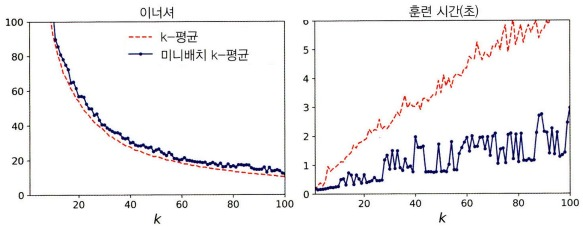

* 두 곡선의 차이는 상당히 일정하게 유지되지만 k가 증가함에 따라 이너셔가 점점 줄어들기 때문에 이 차이가 차지하는 비율은 점점 커짐.
* 미니배치 k-평균이 일반 k-평균보다 훨씬 빠르고 k가 증가함에 따라 더 커짐.

**최적의 클러스터 개수 찾기**
* 만약 클러스터 개수를 올바르게 지정하지 않으면 결과는 매우 나쁠 수 있음.
* 이너셔는 k가 증가함에 따라 점점 작아지므로 k를 선택할 때 좋은 성능 지표가 아님.

* 이너셔 그래프
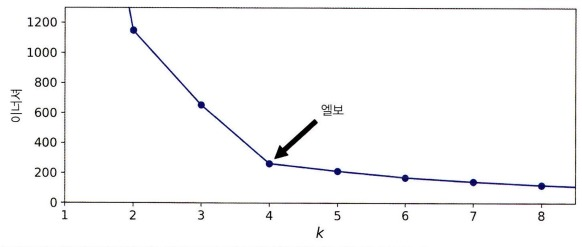

* k는 4까지 증가할 떄 빠르게 줄어들지만, k가 계속 증가하면 이너셔는 훨씬 느리게 감소함.
* k = 4지점이 엘보이며, k에 대한 정답을 모른다면 4가 좋은 선택이 됨.
* 실루엣 점수: 모든 샘플에 대한 실루엣 계수의 평균
* 샘플의 실루엣 계수: (b - a)/max(a, b)로 계산
 * a: 동일한 클러스터에 있는 다른 샘플까지 평균 거리
 * b: 가장 가까운 클러스터까지 평균 거리
* 실루엣 계수는 -1에서 +1까지 바뀔 수 있음.
 * +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다는 뜻.
 * 0에 가까우면 클러스터 경계선에 위치한다는 의미
 * -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다는 의미
* 사이킷런의 silhouette_score() 함수를 사용.

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

* 실루엣 점수를 사용해 클러스터 개수 k를 선택하기
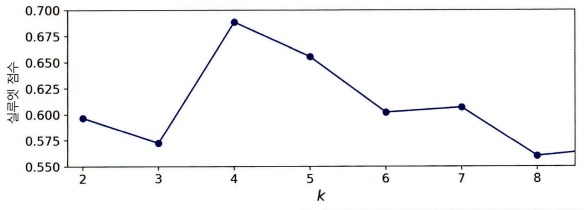

* k = 4가 좋은 선택이지만 k = 5도 꽤 좋다는 사실을 잘 보여줌.
* 실루엣 다이어그램: 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그린 그래프
 * 높이: 클러스터가 포함하고 있는 샘플의 개수
 * 너비: 이 클러스터에 포함된 샘플의 정렬된 실루엣 계수

* 여러 가지 k값에 대한 실루엣 다이어그램 분석
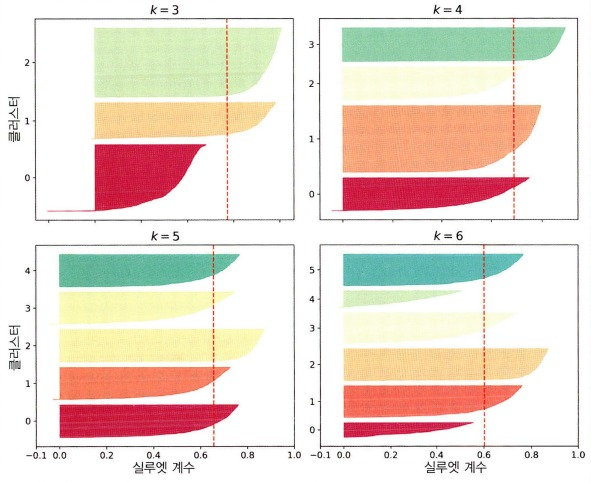

* 수직 파선: 각 클러스터 개수에 해당하는 실루엣 점수
* 한 클러스터의 샘플 대부분이 이 점수보다 낮은 계수를 가지면 클러스터의 샘플이 다른 클러스터랑 너무 가깝다는 것을 의미하므로 나쁜 클러스터임.
* k = 4나 k = 5일 때 클러스터가 상당히 좋아보임.
* k = 4일 때 인덱스 1의 클러스터가 매우 크고, k = 5일 때는 모든 클러스터의 크기가 비슷함. 따라서 k = 5를 선택하는 것이 좋음.

### 9.1.2 k-평균의 한계
* k-평균의 장점: 속도가 빠르고 확장이 용이.
* k-평균의 단점: 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 함. 또한 클러스터의 개수를 지정해야 함. 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않음.

### 9.1.3 군집을 사용한 이미지 분할
* 이미지 분할: 이미지를 세그먼트에 여러 개로 분할하는 작업
* 시멘틱 분할에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당됨.
* 색상 분할: 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당

In [14]:
import os
import urllib.request

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7d21a3f41810>)

In [15]:
from matplotlib.image import imread
image = imread(os.path.join("images","unsupervised_learning","ladybug.png"))
image.shape

(533, 800, 3)

* 첫 번째 차원의 크기가 높이이고 두 번째는 너비, 세 번째는 컬러 채널 개수.
* 여기에는 빨강, 초록, 파랑 채널이 있으며, 0.0과 1.0 사이임.
* 어떤 이미지는 더 적은 채널을 가지고, 어떤 이미지는 더 많은 채널을 가짐.

In [16]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

* 다양한 클러스터 개수로 k-평균을 사용해 만든 이미지 분할
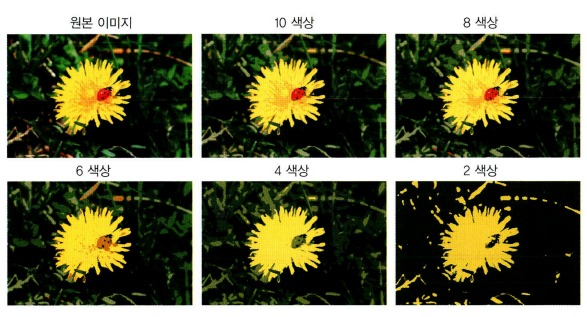

* 8개보다 클러스터 개수를 작게 하면 무당벌레의 화려한 빨간색이 독자적인 클러스터를 만들지 못하고 주위 색이 합쳐짐. 이는 k-평균이 비슷한 크기의 클러스터를 만드는 경향이 있기 때문.

### 9.1.4 군집을 사용한 전처리
* 군집은 차원 축소에 효과적인 방법이며, 특히 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있음.

In [17]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [20]:
log_reg.score(X_test, y_test)

0.9733333333333334

In [21]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 50)),
    ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [22]:
pipeline.score(X_test, y_test)

0.9711111111111111

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=2; total time=   1.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.8s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.8s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.0s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [24]:
grid_clf.best_params_

{'kmeans__n_clusters': 54}

In [25]:
grid_clf.score(X_test, y_test)

0.9688888888888889

### 9.1.5 군집을 사용한 준지도 학습
* 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용

In [26]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [27]:
log_reg.score(X_test, y_test)

0.8111111111111111

* 대표 이미지: 훈련 세트를 클러스터로 모으고, 각 클러스터에서 센트로이드에 가장 가까운 이미지

In [28]:
k = 50
kmeans = KMeans(n_clusters = k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]

In [29]:
y_train[representative_digit_idx]

array([9, 8, 7, 0, 6, 4, 8, 8, 2, 9, 4, 1, 2, 8, 3, 1, 6, 9, 0, 5, 5, 2,
       2, 7, 9, 7, 5, 4, 3, 1, 4, 4, 7, 1, 2, 8, 5, 6, 1, 4, 3, 1, 5, 4,
       0, 8, 6, 1, 7, 6])

In [30]:
y_representative_digits = np.array([6, 3, 7, 1, 7, 2, 0, 4, 9, 5, 5, 4, 5, 2, 7, 5,
                                    9, 8, 8, 7, 3, 3, 0, 4, 2, 2, 1, 7, 3, 1, 1, 3,
                                    8, 6, 1, 2, 2, 0, 9, 5, 1, 4, 1, 4, 6, 6, 6, 3,
                                    3, 5])

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.10222222222222223

* 레이블 전파: 레이블을 동일한 클러스터에 있는 모든 샘플로 전파

In [32]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.08

In [34]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.09555555555555556

In [36]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.10380622837370242

* 능동 학습 - 불확실성 샘플링
 1. 지금까지 수집한 레이블된 샘플에서 모델을 훈련. 이 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만듦.
 2. 모델이 가장 불확실하게 예측한 샘플을 전문가에게 보내 레이블을 붙힘.
 3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복

### 9.1.6 DBSCAN
* $\varepsilon$-이웃: 알고리즘이 각 샘플에서 작은 거리인 $\varepsilon$ 내에 샘플이 몇 개 놓여 있는지 셈
* 핵심 샘플: $\varepsilon$-이웃 내에 적어도 min_samples개 샘플이 있다면 간주함. 밀집된 지역에 있는 샘플.
* 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속함. 이웃에는 다른 핵심 샘플이 포함될 수 있음. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성.
* 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단.

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [38]:
dbscan.labels_

array([ 0,  1,  2,  1,  1,  0,  1, -1,  1,  1,  0,  1,  3,  2,  0,  1,  1,
        0,  3,  1,  3,  2,  0,  4,  0,  1,  0,  3, -1,  0,  3,  3,  3,  2,
        5,  0, -1,  2,  0,  3,  0,  4,  2,  0,  0,  0,  1,  0, -1,  5,  6,
        0,  1,  0,  0,  1,  0,  0,  3,  1,  4,  0,  0,  0,  4,  4,  1,  3,
        0,  1,  7,  3,  3,  3,  3,  1,  3,  5,  1,  5,  0,  3,  4,  0,  5,
        7,  0,  1,  2,  0,  1,  1,  0,  1,  0,  0,  0,  1,  4,  7,  3,  0,
        1,  4,  3,  0,  5,  1, -1,  4,  3,  4,  1,  1,  4,  1,  7,  0,  1,
        4,  0,  5,  0, -1,  7,  4,  7,  0,  0,  4,  0,  5,  0,  7,  0,  0,
        0,  4,  0,  0,  2,  7,  0,  1, -1,  0,  1,  0,  1,  2,  0,  5, -1,
        7,  1,  1,  3,  0,  2, -1,  1,  1,  0,  3,  0,  2,  5,  4,  2,  0,
        1, -1,  4,  5,  5, -1,  0,  4,  0,  0,  0,  7,  2,  5,  0,  2,  3,
        6,  0,  0,  0,  0,  5,  1,  1,  0,  3,  3,  2,  1,  2,  1,  2, -1,
        1,  0,  4,  3,  1,  4,  2,  0,  3,  3,  0, -1,  2,  2,  1,  0, -1,
        0,  1,  4,  2,  0

* 인덱스가 -1이라는 것은 알고리즘이 이 샘플을 이상치로 판단했다는 의미.
* 핵심 샘플의 인덱스는 인스턴스 변수 core_sample_indices_에서 확인할 수 있으며, 핵심 샘플 자체는 인스턴스 변수 components_에 저장되어 있음.

In [39]:
len(dbscan.core_sample_indices_)

807

In [40]:
dbscan.core_sample_indices_

array([  0,   1,   2,   4,   5,   6,   8,   9,  10,  11,  13,  15,  16,
        17,  18,  19,  20,  21,  23,  24,  25,  26,  27,  30,  31,  33,
        34,  35,  37,  38,  40,  41,  42,  43,  44,  46,  47,  49,  50,
        51,  52,  53,  54,  55,  57,  58,  60,  62,  63,  64,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,  80,  81,
        82,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 102, 103, 104, 105, 106, 107, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 124, 125, 126,
       128, 129, 130, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142,
       143, 145, 146, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 172, 174, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 205, 206, 207,
       208, 209, 211, 212, 213, 214, 216, 218, 221, 223, 224, 22

In [41]:
dbscan.components_

array([[ 1.65636905, -0.26260598],
       [-1.03899209,  0.11184665],
       [-0.02947921,  0.99232258],
       ...,
       [ 0.70488944,  0.7760337 ],
       [ 0.16693061,  0.05460622],
       [ 1.84086445,  0.00869991]])

* 두 가지 다른 이웃 반경을 사용한 DBSCAN 군집
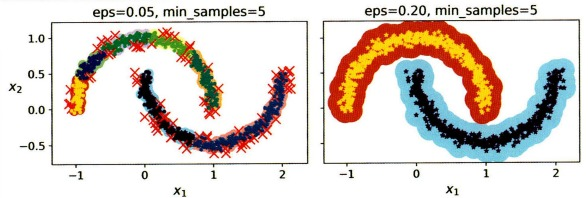

* eps를 0.2로 증가해 샘플의 이웃 범위를 넓히면 오른쪽 그래프처럼 완벽한 군집을 얻음.
* DBSCAN 클래스는 predict() 메서드를 제공하지 않고 fit_predict() 메서드를 제공함. 이 알고리즘은 새로운 샘플에 대해 클러스터를 에측할 수 없음. 따라서 사용자가 필요한 예측기를 선택해야 함.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [43]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 4, 7])

In [44]:
knn.predict_proba(X_new)

array([[0.2 , 0.8 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.36, 0.  , 0.  , 0.  , 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.72]])

* 훈련 세트에 이상치가 없기 때문에 클러스터가 멀리 떨어져 있더라도 분류기는 항상 클러스터 한 개를 선택함.
* 최대 거리를 사용하면 두 클러스터에서 멀리 떨어진 샘플을 이상치로 간단히 분류할 수 있음.
* KNeighborsClassifier의 kneighbors() 메서드에 샘플을 전달하면 훈련 세트에서 가장 가까운 k개 이웃의 거리와 인덱스를 반환함.

In [45]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors = 1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  4, -1])

* 두 클러스터 사이의 결정 경계
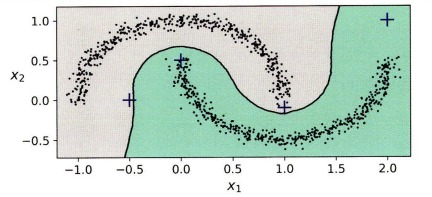

* DBSCAN은 매우 간단하지만 강력한 알고리즘이고, 클러스터의 모양과 개수에 상관없이 감지할 수 있는 능력이 있음.
* 이상치에 안정적이고 하이퍼파라미터가 두 개 뿐임.
* 하지만 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능함.
* 계산 복잡도는 대략 $O(m logm)$. 샘플 개수에 대해 거의 선형적으로 증가. 하지만 사이킷런의 구현은 eps가 커지면 $O(m^2)$만큼 메모리가 필요함.

### 9.1.7 다른 군집 알고리즘
**병합 군집**
* 클러스터 계층을 밑바닥부터 위로 쌓아 구성. * 비슷하게 반복마다 병합 군집은 인접한 클러스터 쌍을 연결. 병합된 클러스터 쌍을 모두 그리면 클러스터의 이진 트리를 얻을 수 있음.
* 이 트리의 리프는 개별 샘플
*대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있음.
* 이웃한 샘플 간의 거리를 담은 mxm 크기 희소 행렬을 연결 행렬로 전달하는 식으로 대규모 샘플에도 잘 적용할 수 있음.
* 연결 행렬이 없으면 대규모 데이터셋으로 확장하기 어려움.

**BIRCH**
* 특별히 대규모 데이터셋을 위해 고안됨.
* 특성 개수가 너무 많지 않다면 배치 k-평균보다 빠르고 비슷한 결과를 만듦.
* 훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조를 만들고, 이 트리에 모든 샘플을 저장하지 않음.
* 이 방식은 제한된 메모리를 사용해 대용량 데이터셋을 다룰 수 있음.

**평균-이동**
* 각 샘플을 중심으로 하는 원을 그린 후, 원마다 포함된 모든 샘플의 평균을 구함.
* 원의 중심을 평균점으로 이동시킴. 모든 원이 움직이지 않을 때까지 평균-이동을 계속함.
* 지역의 최대 밀도를 찾을 때까지 높은 쪽으로 원을 이동시킴. 동일한 지역에 안착한 원에 있는 모든 샘플은 동일한 클러스터가 됨.
* DBSCAN과 유사하게 모양이나 개수에 상관없이 클러스터를 찾을 수 있음. 하이퍼파라미터도 매우 적음. 국부적인 밀집도 추정에 의존.
* DBSCAN과 달리 클러스터 내부 밀집도가 불균형할 때 여러 개로 나누는 경향이 있음.
* 복잡도는 $O(m^2)$이기 때문에 대규모 데이터셋에는 적합하지 않음.

**유사도 전파**
* 투표 방식을 사용.
* 샘플은 자신을 대표할 수 있는 비슷한 샘플에 투표함.
* 알고리즘이 수렴하면 각 대표와 투표한 샘플이 클러스터를 형성. 크기가 다른 여러 개의 클러스터를 감지할 수 있음.
* 복잡도는 $O(m^2)$이기 때문에 대규모 데이터셋에는 적합하지 않음.

**스펙트럼 군집**
* 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만듦.(차원 축소)
* 이 저차원 공간에서 또 다른 군집 알고리즘을 사용.
* 복잡한 클러스터 구조를 감지하고 그래프 컷을 찾는 데 사용할 수 있음.
* 샘플 개수가 많으면 잘 적용되지 않고 클러스터의 크기가 매우 다르면 잘 동작하지 않음.


## 9.2 가우시안 혼합
* 가우시한 혼합 모델(GMM): 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델.
* 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성. 일반적으로 이 클러스터는 타원형.
* 각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다름. 샘플이 주어지면 가우시안 분포 중 하나에서 생성되었다는 것을 알지만, 어떤 분포인지 또 이 분포의 파라미터는 무엇인지 알지 못함.

* 가우시안 혼합 모델의 그래프 모형
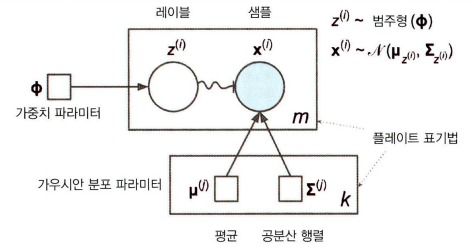

* 원은 확률 변수를 나타냄
* 사각형은 고정값을 나타냄.(모델의 파라미터)
* 큰 사각형을 플레이트라고 부르며, 이 사각형 안의 내용이 여러 번 반복된다는 것을 나타냄.
* 각 플레이트 오른쪽 아래의 숫자는 얼마나 플레이트 안의 내용이 반복되는지를 표시.
* 각 변수 $z^{(i)}$는 가중치 $\Phi$를 갖는 범주형 분포에서 샘플링함. 각 변수 $x^{(i)}$는 해당하는 클러스터 $z^{(i)}$로 정의된 평균과 공분산 행렬을 사용해 정규분포에서 샘플링함.
* 실선 화살표는 조견부 의존성을 표현.
* $z^{(i)}$에서 $x^{(i)}$까지 구불구불한 화살표는 스위치를 나타냄.
* 색이 채워진 원은 알려진 값이라는 의미. 확률 변수 $x^{(i)}$만 알고있는 값. 이를 관측변수라고 하고, 알려지지 않은 확률 변수 $z^{(i)}$를 잠재 변수라고 부름.

In [46]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [47]:
gm.weights_

array([0.20097914, 0.20446117, 0.59455969])

In [48]:
gm.means_

array([[ 1.74868428, -0.05594711],
       [-0.74038305,  0.55991985],
       [ 0.50378011,  0.24547499]])

In [49]:
gm.covariances_

array([[[ 0.04926652,  0.05967472],
        [ 0.05967472,  0.08899249]],

       [[ 0.05345294,  0.06218478],
        [ 0.06218478,  0.08637268]],

       [[ 0.16813495, -0.10381328],
        [-0.10381328,  0.29020622]]])

* 기댓값-최대화(EM) 알고리즘을 사용.
* 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복함.
* 먼저 샘플을 클러스터에 할당하고, 클러스터를 업데이트함.
* k-평균과 달리 EM은 하드 클러스터 할당이 아니라 소프트 클러스터 할당을 사용.
* 클러스터에 속할 추정 확률로 샘플에 가중치가 적용됨. 이 확률을 샘플에 대한 클러스터의 책임이라고 부름.
* 최대화 단계에서 클러스터 업데이트는 책임이 가장 많은 샘플에 크게 영향을 받음.

In [50]:
gm.converged_

True

In [51]:
gm.n_iter_

16

* 새로운 샘플을 가장 비슷한 클러스터에 할당할 수 있음.(하드 군집) - predict() 메서드 이용
* 또는 특정 클러스터에 속할 확률을 예측할 수 있음. (소프트 군집) - predict_proba() 메서드 이용


In [52]:
gm.predict(X)

array([0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1,
       2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1,

In [53]:
gm.predict_proba(X)

array([[9.89209320e-001, 1.10850779e-225, 1.07906804e-002],
       [9.81645395e-198, 9.99916215e-001, 8.37849689e-005],
       [5.26755753e-147, 2.88418870e-004, 9.99711581e-001],
       ...,
       [8.30698271e-062, 1.37133042e-041, 1.00000000e+000],
       [1.86103370e-064, 4.33252411e-041, 1.00000000e+000],
       [9.98844931e-001, 3.26921165e-223, 1.15506931e-003]])

* 생성 모델: 이 모델에서 새로운 샘플을 만들 수 있음.

In [54]:
X_new, y_new = gm.sample(6)
X_new

array([[ 1.81344021, -0.06085157],
       [-0.56993188,  0.73646217],
       [ 0.54977374,  0.11410864],
       [ 0.2213709 ,  0.32027149],
       [ 0.32370953,  0.9343752 ],
       [ 0.83804456, -0.02392176]])

In [55]:
y_new

array([0, 1, 2, 2, 2, 2])

* score_samples() 메서드를 사용하여 주어진 위치에서 모델의 밀도를 추정할 수 있음.
* 점수가 높을수록 밀도가 높음.

In [56]:
gm.score_samples(X)

array([-0.23609586, -1.02276154, -1.95392251, -2.5154269 , -2.22287007,
       -1.24659523, -0.71358924, -0.33722277, -0.16777421, -1.17333348,
       -1.7013428 , -0.16597976, -1.46941204, -1.70675038, -0.95728619,
       -0.81315533, -0.27932441, -1.47860497, -1.87088356, -1.85383914,
       -1.71589443, -1.9548796 , -1.55169477, -1.33623264, -1.43263576,
       -2.17091522, -1.56611012, -1.77343438, -1.72034672, -1.89879117,
       -1.63352875, -1.4178252 , -1.93957046, -1.74401929, -1.0068577 ,
       -1.78795821, -1.2492513 , -1.86487269, -1.5263419 , -1.79190948,
       -1.49126565, -1.69189698, -2.11966047, -2.28485649, -2.0595814 ,
       -0.58563135, -0.47738365, -1.60574101, -2.09228923, -0.30139829,
       -1.69308877, -1.46001938, -0.09168581, -1.6039415 , -0.36287181,
        0.05288602, -1.66266038, -1.21502209, -1.44365466, -0.69527021,
       -1.59864354, -1.32683415, -1.32630349, -1.61502661, -1.59741263,
       -1.28397172, -0.1718242 , -1.66059384, -1.73293738, -1.51

* 이 값은 하나의 확률이 아니라 확률 밀도이며, 즉 0에서 1까지 값이 아니라 어떤 양숫값도 될 수 있음.
* 샘플이 특정 지역 안에 속할 확률을 예측하려면 그 지역에 대해 PDF를 적분해야 함.

* 훈련된 가우시안 혼합 모델의 클러스터 평균, 결정 경계, 밀도 등고선
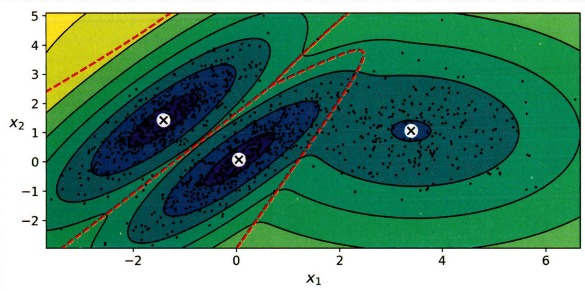

* 특성이나 클러스터가 많거나 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어려움.
* 이런 작업의 어려움을 줄이려면 알고리즘이 학습할 파라미터 개수를 제한해야 함.
* 이런 방법 중 하나는 클러스터의 모양과 방향의 범위를 제한하는 것.
* covariance_type 매개변수에 설정
 * spherical: 모든 클러스터가 원형이지만, 지름은 다를 수 있음
 * diag: 클러스터는 크기에 상관없이 어떤 타원형도 가능하지만, 타원의 축은 좌표 축과 나란해야 함
 * tied: 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐.

* 타이드(tied)와 클러스터(왼쪽)과 원형 클러스터(오른쪽)를 사용한 가우시안 혼합
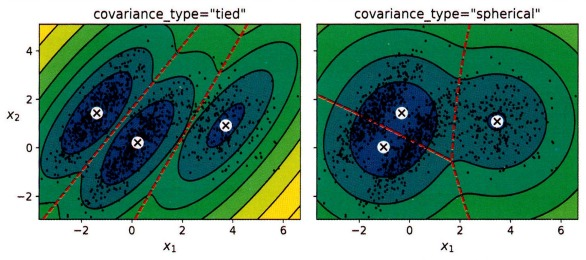

### 9.2.1 가우시안 혼합을 사용한 이상치 탐지
* 이상치 탐지: 보통과 많이 다른 샘플을 감지하는 작업
 * 이상치: 보통과 많이 다른 샘플
 * 정상치: 보통 샘플
* 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있음.
* 사용할 밀도 임곗값을 정해야 함.
 * 만약 거짓 양성이 너무 많다면 임곗값을 더 낮춤.
 * 반대로 거짓 음성이 너무 많다면 임곗값을 더 높임.

In [57]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

* 특이치 탐지: 이상치로 오염되지 않은 "깨끗한" 데이터셋에서 훈련함.

### 9.2.2 클러스터 개수 선택하기
* 가우시안 혼합에서는 이너셔나 실루엣 점수를 사용할 수 없음. 클러스터가 타원형이거나 크기가 다를 때 안정적이지 않기 때문.
* $BIC = log(m)p - 2log(\hat{L})$
* $AIC = 2p-2log(\hat{L}$
 * m: 샘플의 개수
 * p: 모델이 학습할 파라미터 개수
 * $\hat{L}$: 가능도 함수의 최댓값
* BIC와 AIC는 모두 학습할 파라미터가 많은(즉 클러스터가 많은) 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함.
* 둘의 선택이 다를 경우 BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한(파라미터가 적은) 경향이 있음.
* 가능도 함수
 * 확률: 미래 출력 x가 얼마나 그럴듯한지 설명함.
 * 가능도: 출력 x를 알고 있을 때 특정 파라미터 값 $\theta$가 얼마나 그럴듯한지 설명함.
 * PDF는 x의 함수($\theta$ 고정). 반면 가능도 함수는 $\theta$의 함수(x 고정).
 * 가능한 모든 x에 대해서 확률 분포를 적분하면 항상 1이 되지만, 가능한 모든 $\theta$에 대해서 가능도 함수를 적분하면 어떤 양숫값도 될 수 있음.
 * 최대 가능도 추정(MLE): 데이터의 가능도를 최대화하는 $\theta$를 찾는 방법
 * 최대 사후 확률(MAP): 모델 파라미터의 사후 확률을 최대화하는 값을 추정하는 방법
 * 가능도 함수를 최대화하는 것은 함수의 로그를 최대화하는 것과 동일함. 로그 함수는 항상 증가하는 함수이기 때문에 $\theta$가 로그 가능도를 최대화하면 이는 가능도도 최대화함.

In [58]:
gm.bic(X)

2737.3942748678205

In [59]:
gm.aic(X)

2653.962435125124

* 여러 가지 클러스터 개수 k에 대한 AIC와 BIC
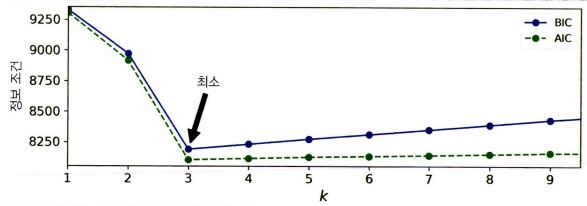

* k = 3에서 BIC와 AIC가 모두 가장 작음. 따라서 k = 3이 최선의 선택.

### 9.2.3 베이즈 가우시안 혼합 모델
* 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 클래스를 사용할 수 있음.
* 클러스터 개수 n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정.
* 자동으로 불필요한 클러스터를 제거함.

In [61]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.13, 0.12, 0.15, 0.16, 0.12, 0.11, 0.11, 0.1 , 0.  , 0.  ])

* 이 모델에서 클러스터 파라미터(가중치, 평균, 공분산 행렬 등)는 더는 고정된 모델 파라미터가 아니라 클러스터 할당처럼 잠재 확률 변수로 취급됨. 따라서 이제 z는 클러스터 파라미터와 클러스터 할당을 모두 포함함.
* 베타 분포: 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용됨.
* 베이즈 가우시안 혼합 모델
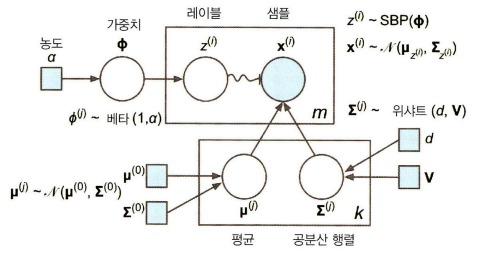

* 잠재 변수 z에 대한 사전 지식이 사전 확률이라는 확률 분포 p(z)에 인코딩될 수 있음.
* 클러스터 개수에 대한 사전 믿음은 weight_concentration_prior 매개변수를 사용해 조절할 수 있음.
* 베이즈 정리: 데이터 X를 관측하고 난 후 잠재 변수에 대한 확률 분포를 업데이트하는 방법.
 * X가 주어졌을 때 z의 조건부 확률인 사후 확률 분포 p(z|X)를 계산.
 * p(z|X) = 사후 확률 = $ \frac{가능도 \times 사전 확률}{증거} = \frac{p(X|z)p(z)}{p(X)}$
 * $p(X) = \int_ {}^{}p(X|z)p(z)dz$
* 변분 추론: 변분 파라미터 $\lambda$를 가진 분포 패밀리 $q(z; \lambda)$를 선택함. 그 다음 q(z)가 p(z|X)의 좋은 근삿값이 되도록 이 파라미터를 최적화함. q(z)에서 p(z|X)로의 KL 발산을 최소화하는 $\lambda$값을 찾아 이를 해결.
* q(z)에서 p(z|X)로의 KL 발산
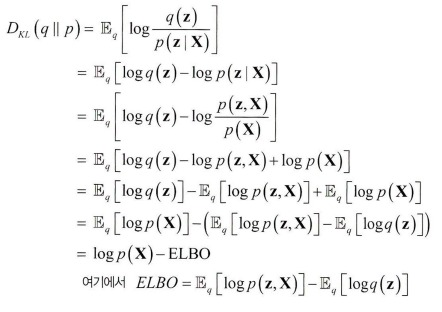

* 평균장 변분 추론: ELBO 식을 게산할 수 있는 형태로 단순화하기 위해 분포 패밀리 $q(z;\lambda)$와 사전 확률 p(z)를 매우 주의 깊게 선택해야 함. 이를 위한 일반적인 방법이 없으며, 수학적 기술이 필요함.
* 블랙 박스 확률적 변분 추론: ELBO를 최대화하는 간단한 방법. 각 반복에서 몇 개의 샘플을 q에서 뽑아 변분 파라미터 $\lambda$에 대하 ELBO의 그레이디언트를 추정하는 데 사용. 그다음 경사 상승법 스텝에서 사용.
* 어떤 종류의 모델과도 베이즈 추론을 사용할 수 있게 만듦.
* 딥러닝: 심층 신경망에서 사용하는 베이즈 추론


### 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘
 * PCA: 데이터의 분산을 최대화하는 방향으로 데이터를 직교 변환하여 차원을 축소하는 기법
 * Fast-MCD: 이상치 감지에 유용하며, 데이터셋을 정제할 대 사용. 보통 샘플이 하나의 가우시안 분포에서 생성되었다고 가정.
 * 아이솔레이션 포레스트: 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘.
 * LOF: 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교.
 * one-class SVM: 주어진 학습 데이터와 가장 가까운 결정 경계를 찾아 그 경계 밖의 새로운 데이터 포인트를 이상치로 간주하는 알고리즘